Assignment:4
1. you have to create one supervisor node.
2. create one router function
3. create three more node
3.1 llm call (llm node)
3.2 RAG (rag node)
3.3 web crawler(fetch the info in realtime from internet)
4. created one more node after this for validation for generated output --> explore the validation part how to do that
5. if validation going to be failed in that case again go to supervioser node and then supervisor node will again decide what needs to be call next
6. once the validation will pass then only generate the final output

In [1]:
print("all ok")

all ok


Configuring a model

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY") 

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


In [4]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

/Users/saicharan/agenticai/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

Let us take data, embeded it and store in vector database

In [5]:
from langchain_community.document_loaders import  TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [6]:
loader=DirectoryLoader("/Users/saicharan/agenticai/Langgraph Assignments/DATA",glob="./*.txt",loader_cls=TextLoader)

In [7]:
docs=loader.load()


In [8]:
docs

[Document(metadata={'source': '/Users/saicharan/agenticai/Langgraph Assignments/DATA/Parliament_of_India.txt'}, page_content='Parliament of India\n\nThe Parliament of India is the highest legislative body in the country, responsible for making laws, \noverseeing the government, and representing \nthe citizens of India. It consists of two houses — the Rajya Sabha (Council of States) and the \nLok Sabha (House of the People) — along with the President of India, who plays a key role in the \nlegislative process. The Rajya Sabha is a permanent body with members elected by the state legislatures,\nwhile the Lok Sabha is composed of members directly elected by the public through general elections held every \nfive years. The Parliament meets at the Sansad Bhavan in New Delhi and plays a vital role in shaping the nation’s policies, \npassing the budget, and holding the executive accountable. As a cornerstone of Indian democracy, the Parliament ensures that the\nvoices of the people are heard 

In [9]:
print(docs[0].page_content)

Parliament of India

The Parliament of India is the highest legislative body in the country, responsible for making laws, 
overseeing the government, and representing 
the citizens of India. It consists of two houses — the Rajya Sabha (Council of States) and the 
Lok Sabha (House of the People) — along with the President of India, who plays a key role in the 
legislative process. The Rajya Sabha is a permanent body with members elected by the state legislatures,
while the Lok Sabha is composed of members directly elected by the public through general elections held every 
five years. The Parliament meets at the Sansad Bhavan in New Delhi and plays a vital role in shaping the nation’s policies, 
passing the budget, and holding the executive accountable. As a cornerstone of Indian democracy, the Parliament ensures that the
voices of the people are heard and the rule of law is maintained.

The Parliament of India is the supreme legislative body of the Republic of India. It is a bicameral 

CREATING AN AGENT

IMPORITING ALL THE LIBRAIES AND PACKAGES

In [12]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END, START
from langchain.output_parsers import PydanticOutputParser
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS


In [13]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')


In [14]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

CREATING AN AGENTIC STATES

In [15]:
class Agentstate(TypedDict):
      messages: Annotated[Sequence[BaseMessage], operator.add]


In [21]:
def function_1(state:Agentstate):
    pass

In [19]:
def router(state:Agentstate):
    print("-> ROUTER ->")

In [20]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [27]:
# RAG function
def function_2(state:Agentstate):
    print("<-RAG CALL->")

In [26]:
# LLM Function
def function_3(state:Agentstate):
    print("-> LLM Call ->")

In [32]:
from langchain_community.tools import DuckDuckGoSearchRun
def search_fun(state:Agentstate):
    pass

In [29]:
def function_4(state:Agentstate):
    pass

In [30]:
def router_1(state:Agentstate):
    print("-> ROUTER_1 ->")

In [33]:
workflow = StateGraph(Agentstate)
workflow.add_node("Supervisor",function_1)
workflow.add_node("RAG",function_2)
workflow.add_node("LLM",function_3)
workflow.add_node("WEB", search_fun)
workflow.add_node("VALIDATION",function_4)
workflow.set_entry_point("Supervisor")


In [ ]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
       {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
        "WEB Call": "WEB",
    }
)

In [34]:
workflow.add_edge("RAG","VALIDATION")
workflow.add_edge("LLM","VALIDATION")
workflow.add_edge("WEB","VALIDATION")

In [35]:
workflow.add_conditional_edges(
    "VALIDATION",
    router_1,
    {
        "yes": END,
        "no":"Supervisor"
    }

)

In [36]:
app=workflow.compile()

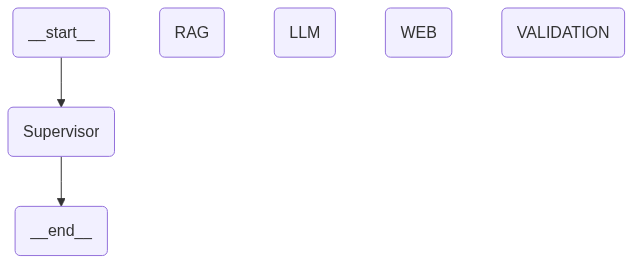

In [37]:
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))